<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [40]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt

In [41]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [42]:
# Create the data parameters
weight, bias = 0.3, 0.9

# Make X and y using linear regression feature
X = torch.arange(start=0, end=1, step=0.01).unsqueeze(dim=1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [43]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

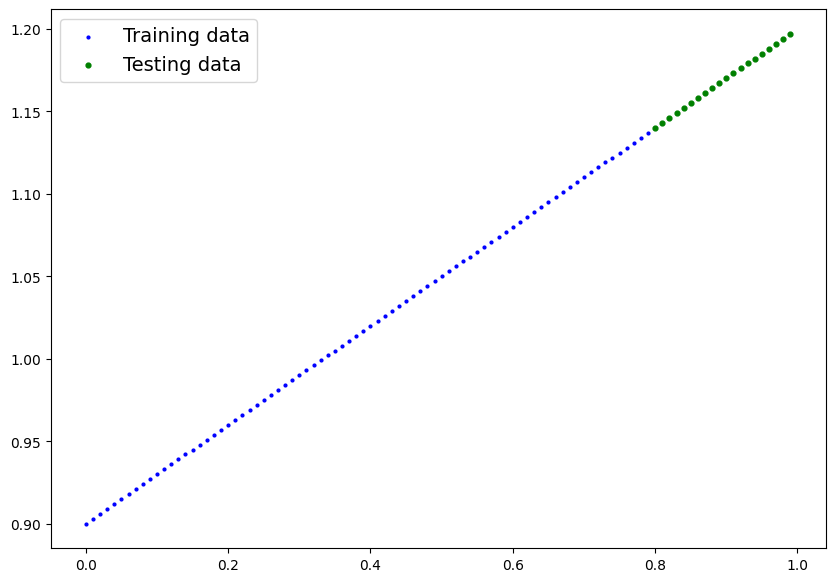

In [44]:
# Plot the training and testing data 
# "visualize, visualize, visualize!"

def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):  
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=12, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});
  
plot_predictions();

## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [45]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()   
        self.weights = nn.Parameter(
            data=torch.randn(1),
            requires_grad=True
        )
        self.bias = nn.Parameter(
            data=torch.randn(1),
            requires_grad=True
        )
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.weights * X + self.bias
    
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()   
        self.linear_layer = nn.Linear(
            in_features=1,
            out_features=1
        )
        
    def forward(self, X: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(X)

In [46]:
torch.manual_seed(42)

# Instantiate the model and put it to the target device
model_v1 = LinearRegressionModel().to(device)
model_v2 = LinearRegressionModelV2().to(device)

model_v1.state_dict(), model_v2.state_dict()

(OrderedDict([('weights', tensor([0.3367], device='cuda:0')),
              ('bias', tensor([0.1288], device='cuda:0'))]),
 OrderedDict([('linear_layer.weight', tensor([[-0.2191]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.2018], device='cuda:0'))]))

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [47]:
# Create the loss function and optimizer
loss_fn = nn.L1Loss()
optimizer_v1 = torch.optim.SGD(
    params=model_v1.parameters(),
    lr=0.01
)
optimizer_v2 = torch.optim.SGD(
    params=model_v2.parameters(),
    lr=0.01
)

In [48]:
# Training loop
def trainer(model, loss_fn: nn.L1Loss, optimizer: torch.optim.SGD):
    # Train model for 300 epochs
    epochs = 300

    # Send data to target device
    X_train_device, y_train_device = X_train.to(device), y_train.to(device)
    X_test_device, y_test_device = X_test.to(device), y_test.to(device)

    for epoch in range(epochs):
        ### Training

        # Put model in train mode
        model.train()

        # 1. Forward pass
        y_pred = model(X_train_device)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y_train_device)

        # 3. Zero gradients
        optimizer.zero_grad()

        # 4. Backpropagation
        loss.backward()

        # 5. Step the optimizer
        optimizer.step()

        ### Perform testing every 20 epochs
        if epoch % 20 == 0:

            # Put model in evaluation mode and setup inference context 
            model.eval()
            
            # 1. Forward pass
            y_pred_test = model(X_test_device)
            
            # 2. Calculate test loss
            test_loss = loss_fn(y_pred_test, y_test_device)
            
            # Print out what's happening
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

In [49]:
# train model v1
trainer(model_v1, loss_fn, optimizer_v1)

Epoch: 0 | Train loss: 0.757 | Test loss: 0.725
Epoch: 20 | Train loss: 0.525 | Test loss: 0.454
Epoch: 40 | Train loss: 0.294 | Test loss: 0.183
Epoch: 60 | Train loss: 0.077 | Test loss: 0.073
Epoch: 80 | Train loss: 0.053 | Test loss: 0.116
Epoch: 100 | Train loss: 0.046 | Test loss: 0.105
Epoch: 120 | Train loss: 0.039 | Test loss: 0.089
Epoch: 140 | Train loss: 0.032 | Test loss: 0.074
Epoch: 160 | Train loss: 0.025 | Test loss: 0.058
Epoch: 180 | Train loss: 0.018 | Test loss: 0.042
Epoch: 200 | Train loss: 0.011 | Test loss: 0.026
Epoch: 220 | Train loss: 0.004 | Test loss: 0.009
Epoch: 240 | Train loss: 0.004 | Test loss: 0.006
Epoch: 260 | Train loss: 0.004 | Test loss: 0.006
Epoch: 280 | Train loss: 0.004 | Test loss: 0.006


In [50]:
# train model v2
trainer(model_v2, loss_fn, optimizer_v2)

Epoch: 0 | Train loss: 0.903 | Test loss: 1.149
Epoch: 20 | Train loss: 0.672 | Test loss: 0.879
Epoch: 40 | Train loss: 0.441 | Test loss: 0.608
Epoch: 60 | Train loss: 0.210 | Test loss: 0.337
Epoch: 80 | Train loss: 0.044 | Test loss: 0.119
Epoch: 100 | Train loss: 0.033 | Test loss: 0.077
Epoch: 120 | Train loss: 0.026 | Test loss: 0.061
Epoch: 140 | Train loss: 0.019 | Test loss: 0.045
Epoch: 160 | Train loss: 0.012 | Test loss: 0.028
Epoch: 180 | Train loss: 0.006 | Test loss: 0.012
Epoch: 200 | Train loss: 0.006 | Test loss: 0.004
Epoch: 220 | Train loss: 0.006 | Test loss: 0.004
Epoch: 240 | Train loss: 0.006 | Test loss: 0.004
Epoch: 260 | Train loss: 0.006 | Test loss: 0.004
Epoch: 280 | Train loss: 0.006 | Test loss: 0.004


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [56]:
# Make predictions with the model v1
model_v1.eval()

with torch.inference_mode():
    y_preds = model_v1(X_test.to(device))
y_preds

tensor([[1.1464],
        [1.1495],
        [1.1525],
        [1.1556],
        [1.1587],
        [1.1617],
        [1.1648],
        [1.1679],
        [1.1709],
        [1.1740],
        [1.1771],
        [1.1801],
        [1.1832],
        [1.1863],
        [1.1893],
        [1.1924],
        [1.1955],
        [1.1985],
        [1.2016],
        [1.2047]], device='cuda:0')

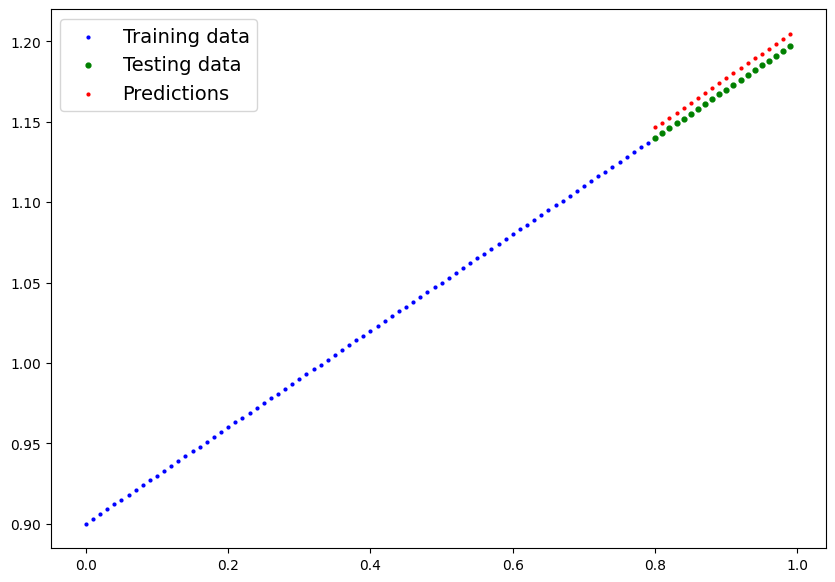

In [57]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

In [58]:
# Make predictions with the model v2
model_v2.eval()

with torch.inference_mode():
    y_preds = model_v2(X_test.to(device))
y_preds

tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577],
        [1.1606],
        [1.1635],
        [1.1665],
        [1.1694],
        [1.1723],
        [1.1753],
        [1.1782],
        [1.1811],
        [1.1840],
        [1.1870]], device='cuda:0')

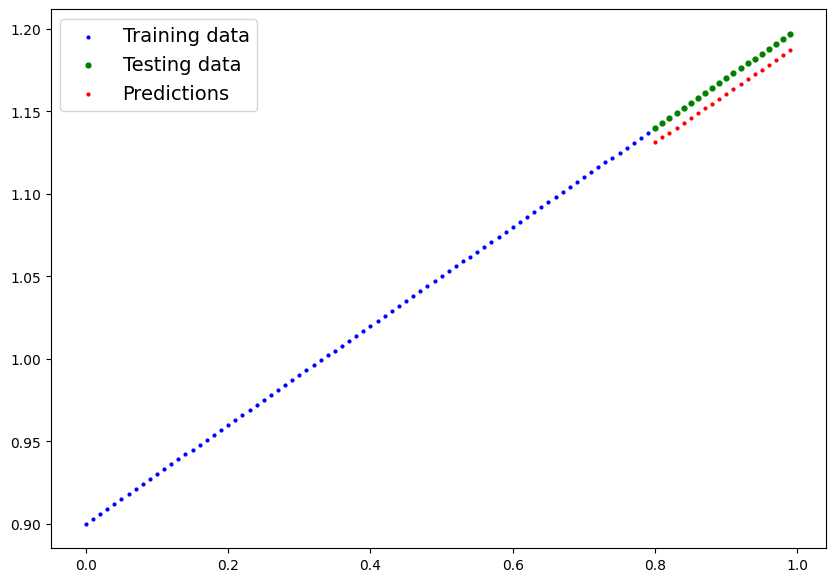

In [59]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions=y_preds.cpu())

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [60]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "01-pytorch-exercises-model-v1.pth"
MODEL_NAME_V2 = "01-pytorch-exercises-model-v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH_V2 = MODEL_PATH / MODEL_NAME_V2

# 3. Save the model state dict
torch.save(obj=model_v1.state_dict(), f=MODEL_SAVE_PATH)
torch.save(obj=model_v2.state_dict(), f=MODEL_SAVE_PATH_V2)

In [64]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model = LinearRegressionModelV2().to(device)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH_V2))

<All keys matched successfully>

In [65]:
# Make predictions with loaded model and compare them to the previous
loaded_model.eval()

with torch.inference_mode():
    loaded_preds = loaded_model(X_test.to(device))
loaded_preds

tensor([[1.1313],
        [1.1342],
        [1.1371],
        [1.1401],
        [1.1430],
        [1.1459],
        [1.1489],
        [1.1518],
        [1.1547],
        [1.1577],
        [1.1606],
        [1.1635],
        [1.1665],
        [1.1694],
        [1.1723],
        [1.1753],
        [1.1782],
        [1.1811],
        [1.1840],
        [1.1870]], device='cuda:0')

In [66]:
y_preds == loaded_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')